<a href="https://colab.research.google.com/github/data2450/rosman-sales-prediciton/blob/main/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [ ]:
t=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/TEST.csv')

t['index1'] = t.index
test_Z=t.loc[t.Open==0]
test_w=t.loc[t.Open==1]

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305163 entries, 0 to 305162
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Date           305163 non-null  object
 3   Open           305163 non-null  int64 
 4   Promo          305163 non-null  int64 
 5   StateHoliday   305163 non-null  object
 6   SchoolHoliday  305163 non-null  int64 
 7   index1         305163 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 18.6+ MB


In [ ]:
test_Z

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,index1
0,767,1,2013-04-01,0,0,b,1,0
5,402,7,2013-02-17,0,0,0,0,5
7,255,7,2013-04-14,0,0,0,0,7
22,137,7,2013-04-14,0,0,0,0,22
29,22,7,2013-04-14,0,0,0,0,29
...,...,...,...,...,...,...,...,...
305106,213,7,2013-01-27,0,0,0,0,305106
305115,320,7,2013-04-07,0,0,0,0,305115
305128,915,7,2013-03-17,0,0,0,0,305128
305138,857,7,2013-01-20,0,0,0,0,305138


In [ ]:
test_op=test_w.sort_values(by='index1',ascending=True)

In [ ]:
kl=test_op[['index1','Date']]

In [ ]:
kl.head()

,index1,Date
1,1,2013-03-16
2,2,2013-08-01
3,3,2013-05-23
4,4,2013-08-06
6,6,2013-03-22


In [ ]:
test_op.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,index1
1,1111,6,2013-03-16,1,0,0,0,1
2,45,4,2013-08-01,1,1,0,1,2
3,500,4,2013-05-23,1,0,0,1,3
4,82,2,2013-08-06,1,0,0,1,4
6,1022,5,2013-03-22,1,1,0,0,6


In [ ]:
tr_o=pd.read_csv('/content/drive/MyDrive/datasets_for_colab/dataset/TRAIN.csv')

tr_o['weekend']=np.where(tr_o['DayOfWeek']>5,1,0)



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
tr_o['Date']=pd.to_datetime(tr_o.Date, format="%Y/%m/%d")

In [ ]:
t['Date']=pd.to_datetime(t.Date, format="%Y/%m/%d")

In [ ]:
tr_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          712046 non-null  int64         
 1   DayOfWeek      712046 non-null  int64         
 2   Date           712046 non-null  datetime64[ns]
 3   Sales          712046 non-null  int64         
 4   Customers      712046 non-null  int64         
 5   Open           712046 non-null  int64         
 6   Promo          712046 non-null  int64         
 7   StateHoliday   712046 non-null  object        
 8   SchoolHoliday  712046 non-null  int64         
 9   weekend        712046 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 54.3+ MB


In [ ]:
tr_o.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
t.StateHoliday.unique()

array(['b', '0', 'a'], dtype=object)

In [ ]:
t.StateHoliday.replace(['b'],['2',0,1],inplace = True)

In [ ]:
tr_o.StateHoliday.replace(['0','a','b','c',0],[0,1,2,3,0],inplace = True)

In [ ]:
def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [ ]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [ ]:
df = tr_o[columns].append(t[columns])

In [ ]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [ ]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [ ]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [ ]:
df = df.set_index("Date")

In [ ]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [ ]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [ ]:
bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()

In [ ]:
bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

In [ ]:
fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [ ]:
df.drop(columns,1,inplace=True)

In [ ]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,2015-07-31,1,0,0,0,0,0,0,5.0,5.0,1.0,1.0
1,2015-07-30,1,0,0,0,0,0,0,4.0,4.0,2.0,2.0
2,2015-07-29,1,0,0,0,0,0,0,3.0,3.0,3.0,3.0
3,2015-07-28,1,0,0,0,0,0,0,2.0,2.0,4.0,4.0
4,2015-07-27,1,0,0,0,0,0,0,1.0,1.0,5.0,5.0


In [ ]:
df.shape

(1017209, 12)

In [ ]:
df.BeforeSchoolHoliday=df.BeforeSchoolHoliday

In [ ]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterPromo', 'BeforePromo', 'AfterStateHoliday', 'BeforeStateHoliday',
       'SchoolHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw', 'Promo_fw'],
      dtype='object')

In [ ]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [ ]:
Train=pd.read_csv('/content/drive/MyDrive/S/up_train.csv')

In [ ]:
Train['Date']=pd.to_datetime(Train.Date, format="%Y/%m/%d")

In [ ]:
joined = join_df(Train, df, ['Store', 'Date'])

In [ ]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589948 entries, 0 to 589947
Data columns (total 46 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      589948 non-null  int64         
 1   DayOfWeek                  589948 non-null  int64         
 2   Date                       589948 non-null  datetime64[ns]
 3   Sales                      589948 non-null  float64       
 4   Customers                  589948 non-null  int64         
 5   Open                       589948 non-null  int64         
 6   Promo                      589948 non-null  int64         
 7   StateHoliday               589948 non-null  int64         
 8   SchoolHoliday              589948 non-null  int64         
 9   StoreType                  589948 non-null  int64         
 10  Assortment                 589948 non-null  int64         
 11  CompetitionDistance        589948 non-null  float64 

In [ ]:
joined.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,month_str,IsPromoMonth,hol_ratio_zero,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,1,5,2015-07-31,8.568646,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0
1,1,4,2015-07-30,8.521384,546,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,30,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,4.0,4.0,2.0,2.0
2,1,3,2015-07-29,8.472823,523,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,29,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,3.0,3.0,3.0,3.0
3,1,2,2015-07-28,8.519590,560,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,28,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,2.0,2.0,4.0,4.0
4,1,1,2015-07-27,8.716536,612,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,27,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,1.0,1.0,5.0,5.0


In [ ]:
joined.shape

(589948, 46)

# holiday

# inverter

In [ ]:
#Train.info()

In [ ]:
#Train.head()

store_data_sales_per_day.columns=['Store','s_per_day']

store_data_customers_per_day.columns=['Store','c_per_day']

store_data_sales_per_customer_per_day.columns=['Store','s_per_c_day']

In [ ]:
ts=pd.read_csv('/content/drive/MyDrive/S/up_test.csv')

In [ ]:
ts=ts.sort_values(by='index1',ascending=True)

In [ ]:
ts.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,index1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,IsPromoMonth,hol_ratio_zero
0,1111,6,0,0,0,1,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,16,3,2013,11,0.0,0.00,1,3236.0,690.70,4013.9,2732.0,2125.47,11.76,1.51,0.60,0,0.0
1,45,4,1,0,1,2,4,1,9710.0,2.0,2014.0,0,0.0,0.0,0,1,8,2013,31,0.0,24163.75,0,5882.5,1076.83,7731.5,5368.5,4366.93,12.74,1.32,1.07,0,0.0
2,500,4,0,0,1,3,4,3,10690.0,9.0,2007.0,1,5.0,2013.0,1,23,5,2013,21,68.0,4.00,0,5023.0,818.36,5969.2,4579.0,3658.88,13.75,1.09,1.18,0,0.0
3,82,2,0,0,1,4,1,1,22390.0,4.0,2008.0,1,37.0,2009.0,1,6,8,2013,32,64.0,46.75,0,7582.5,1553.98,9307.0,6942.0,5092.39,10.62,1.56,0.58,0,0.0
4,1022,5,1,0,0,6,1,3,1520.0,0.0,0.0,0,0.0,0.0,0,22,3,2013,12,24159.0,24159.00,0,8638.5,1991.76,12162.6,7646.0,6522.22,8.77,1.43,0.89,0,0.0


In [ ]:
ts_dat=pd.merge(ts,kl,on='index1')

In [ ]:
ts_dat['Date']=pd.to_datetime(ts_dat.Date, format="%Y/%m/%d")

In [ ]:
ts_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254409 entries, 0 to 254408
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      254409 non-null  int64         
 1   DayOfWeek                  254409 non-null  int64         
 2   Promo                      254409 non-null  int64         
 3   StateHoliday               254409 non-null  int64         
 4   SchoolHoliday              254409 non-null  int64         
 5   index1                     254409 non-null  int64         
 6   StoreType                  254409 non-null  int64         
 7   Assortment                 254409 non-null  int64         
 8   CompetitionDistance        254409 non-null  float64       
 9   CompetitionOpenSinceMonth  254409 non-null  float64       
 10  CompetitionOpenSinceYear   254409 non-null  float64       
 11  Promo2                     254409 non-null  int64   

In [ ]:
full_test_3=join_df(ts_dat, df, ['Store', 'Date'])

In [ ]:
full_test_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254409 entries, 0 to 254408
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      254409 non-null  int64         
 1   DayOfWeek                  254409 non-null  int64         
 2   Promo                      254409 non-null  int64         
 3   StateHoliday               254409 non-null  int64         
 4   SchoolHoliday              254409 non-null  int64         
 5   index1                     254409 non-null  int64         
 6   StoreType                  254409 non-null  int64         
 7   Assortment                 254409 non-null  int64         
 8   CompetitionDistance        254409 non-null  float64       
 9   CompetitionOpenSinceMonth  254409 non-null  float64       
 10  CompetitionOpenSinceYear   254409 non-null  float64       
 11  Promo2                     254409 non-null  int64   

# model

In [ ]:
train_new_on = joined.sort_values(['Date'],ascending = False)

In [ ]:
train_new_on.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,month_str,IsPromoMonth,hol_ratio_zero,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,1,5,2015-07-31,8.568646,555,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,Jul,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0
161674,497,5,2015-07-31,9.337325,1248,1,1,0,1,1,3,1610.0,0.0,0.0,0,0.0,0.0,0,31,7,2015,31,24187.0,24187.75,0,10463.0,1504.44,12622.6,9595.00,8150.47,8.12,1.34,0.77,Jul,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0
159221,137,5,2015-07-31,9.110299,1121,1,1,0,0,1,1,1730.0,7.0,2015.0,1,40.0,2014.0,1,31,7,2015,31,0.0,9.75,0,9626.0,1559.61,11690.2,8604.00,6813.80,8.66,1.31,0.84,Jul,0,0.0,56,0,0,0,0,0,0.0,5.0,0.0,1.0
486665,231,5,2015-07-31,9.030496,614,1,1,0,0,4,3,3840.0,10.0,2008.0,1,39.0,2010.0,2,31,7,2015,31,81.0,58.00,0,5744.0,1011.11,7293.2,5296.00,3949.68,11.94,1.44,1.03,Jul,0,0.0,56,0,0,0,0,0,0.0,5.0,0.0,1.0
159617,257,5,2015-07-31,8.835647,749,1,1,0,1,1,1,420.0,12.0,2012.0,0,0.0,0.0,0,31,7,2015,31,31.0,24187.75,0,6069.5,955.71,7447.3,5540.25,4452.84,8.45,1.38,0.58,Jul,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0


In [ ]:
%cd "/content/drive/MyDrive/datasets_for_colab/dataset"
train_new_on.to_csv('winning_train.csv', index =False)

/content/drive/MyDrive/datasets_for_colab/dataset


In [ ]:
X=train_new_on.drop(['Sales','Customers','Date','Open','month_str'],axis=1)

In [ ]:
X.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,IsPromoMonth,hol_ratio_zero,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,1,5,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0,31,7,2015,31,82.0,24187.75,0,5140.5,870.63,6255.2,4651.75,3776.62,8.41,1.28,1.04,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0
161674,497,5,1,0,1,1,3,1610.0,0.0,0.0,0,0.0,0.0,0,31,7,2015,31,24187.0,24187.75,0,10463.0,1504.44,12622.6,9595.00,8150.47,8.12,1.34,0.77,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0
159221,137,5,1,0,0,1,1,1730.0,7.0,2015.0,1,40.0,2014.0,1,31,7,2015,31,0.0,9.75,0,9626.0,1559.61,11690.2,8604.00,6813.80,8.66,1.31,0.84,0,0.0,56,0,0,0,0,0,0.0,5.0,0.0,1.0
486665,231,5,1,0,0,4,3,3840.0,10.0,2008.0,1,39.0,2010.0,2,31,7,2015,31,81.0,58.00,0,5744.0,1011.11,7293.2,5296.00,3949.68,11.94,1.44,1.03,0,0.0,56,0,0,0,0,0,0.0,5.0,0.0,1.0
159617,257,5,1,0,1,1,1,420.0,12.0,2012.0,0,0.0,0.0,0,31,7,2015,31,31.0,24187.75,0,6069.5,955.71,7447.3,5540.25,4452.84,8.45,1.38,0.58,0,0.0,0,0,0,0,0,0,5.0,5.0,1.0,1.0


In [ ]:
X.shape

(589948, 41)

In [ ]:
y=train_new_on.Sales
y

0         8.568646
161674    9.337325
159221    9.110299
486665    9.030496
159617    8.835647
            ...   
182333    8.756840
547037    8.377931
556114    8.467372
333175    8.784009
589947    8.572817
Name: Sales, Length: 589948, dtype: float64

In [ ]:
re_test_in=full_test_3.sort_values(by='index1',ascending=True)

In [ ]:
re_test_in.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,index1,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,IsPromoMonth,hol_ratio_zero,Date,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,1111,6,0,0,0,1,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,16,3,2013,11,0.0,0.00,1,3236.0,690.70,4013.9,2732.0,2125.47,11.76,1.51,0.60,0,0.0,2013-03-16,71,-9,8,-2,0,0,0.0,0.0,0.0,5.0
1,45,4,1,0,1,2,4,1,9710.0,2.0,2014.0,0,0.0,0.0,0,1,8,2013,31,0.0,24163.75,0,5882.5,1076.83,7731.5,5368.5,4366.93,12.74,1.32,1.07,0,0.0,2013-08-01,0,0,0,0,0,0,5.0,4.0,5.0,2.0
2,500,4,0,0,1,3,4,3,10690.0,9.0,2007.0,1,5.0,2013.0,1,23,5,2013,21,68.0,4.00,0,5023.0,818.36,5969.2,4579.0,3658.88,13.75,1.09,1.18,0,0.0,2013-05-23,0,0,6,-4,0,0,3.0,1.0,5.0,3.0
3,82,2,0,0,1,4,1,1,22390.0,4.0,2008.0,1,37.0,2009.0,1,6,8,2013,32,64.0,46.75,0,7582.5,1553.98,9307.0,6942.0,5092.39,10.62,1.56,0.58,0,0.0,2013-08-06,0,0,4,-6,0,0,5.0,3.0,5.0,1.0
4,1022,5,1,0,0,6,1,3,1520.0,0.0,0.0,0,0.0,0.0,0,22,3,2013,12,24159.0,24159.00,0,8638.5,1991.76,12162.6,7646.0,6522.22,8.77,1.43,0.89,0,0.0,2013-03-22,77,-3,0,0,0,0,0.0,5.0,4.0,5.0


In [ ]:
%cd "/content/drive/MyDrive/datasets_for_colab/dataset"
re_test_in.to_csv('winning_test.csv', index =False)

/content/drive/MyDrive/datasets_for_colab/dataset


In [ ]:
full_test_no=re_test_in.drop(['index1','Date'],axis=1)

In [ ]:
full_test_no.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year,WeekOfYear,CompetitionOpen,PromoOpen,weekend,median,S_std_n,S_90,S_25,S_01,SC_per_med,rat_sales,sat_ratio,IsPromoMonth,hol_ratio_zero,AfterSchoolHoliday,BeforeSchoolHoliday,AfterPromo,BeforePromo,AfterStateHoliday,BeforeStateHoliday,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,1111,6,0,0,0,1,1,1900.0,6.0,2014.0,1,31.0,2013.0,1,16,3,2013,11,0.0,0.00,1,3236.0,690.70,4013.9,2732.0,2125.47,11.76,1.51,0.60,0,0.0,71,-9,8,-2,0,0,0.0,0.0,0.0,5.0
1,45,4,1,0,1,4,1,9710.0,2.0,2014.0,0,0.0,0.0,0,1,8,2013,31,0.0,24163.75,0,5882.5,1076.83,7731.5,5368.5,4366.93,12.74,1.32,1.07,0,0.0,0,0,0,0,0,0,5.0,4.0,5.0,2.0
2,500,4,0,0,1,4,3,10690.0,9.0,2007.0,1,5.0,2013.0,1,23,5,2013,21,68.0,4.00,0,5023.0,818.36,5969.2,4579.0,3658.88,13.75,1.09,1.18,0,0.0,0,0,6,-4,0,0,3.0,1.0,5.0,3.0
3,82,2,0,0,1,1,1,22390.0,4.0,2008.0,1,37.0,2009.0,1,6,8,2013,32,64.0,46.75,0,7582.5,1553.98,9307.0,6942.0,5092.39,10.62,1.56,0.58,0,0.0,0,0,4,-6,0,0,5.0,3.0,5.0,1.0
4,1022,5,1,0,0,1,3,1520.0,0.0,0.0,0,0.0,0.0,0,22,3,2013,12,24159.0,24159.00,0,8638.5,1991.76,12162.6,7646.0,6522.22,8.77,1.43,0.89,0,0.0,77,-3,0,0,0,0,0.0,5.0,4.0,5.0


In [ ]:
full_test_no.shape

(254409, 41)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X, label=y)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.1, 
         'num_iterations': 3000,
         'num_leaves': 69,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 1000
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSE:', (mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's rmse: 0.103879
[200]	valid_0's rmse: 0.0963109
[300]	valid_0's rmse: 0.0916009
[400]	valid_0's rmse: 0.0882635
[500]	valid_0's rmse: 0.0857755
[600]	valid_0's rmse: 0.0836731
[700]	valid_0's rmse: 0.0819241
[800]	valid_0's rmse: 0.0803305
[900]	valid_0's rmse: 0.078847
[1000]	valid_0's rmse: 0.0775938
[1100]	valid_0's rmse: 0.0764041
[1200]	valid_0's rmse: 0.0753087
[1300]	valid_0's rmse: 0.0743531
[1400]	valid_0's rmse: 0.0734298
[1500]	valid_0's rmse: 0.0725675
[1600]	valid_0's rmse: 0.0717249
[1700]	valid_0's rmse: 0.0709936
[1800]	valid_0's rmse: 0.070244
[1900]	valid_0's rmse: 0.0695508
[2000]	valid_0's rmse: 0.0688499
[2100]	valid_0's rmse: 0.0682264
[2200]	valid_0's rmse: 0.0676195
[2300]	valid_0's rmse: 0.0670818
[2400]	valid_0's rmse: 0.066528
[2500]	valid_0's rmse: 0.0659918
[2600]	valid_0's rmse: 0.0654288
[2700]	valid_0's rmse: 0.0649069
[2800]	valid_0's rmse: 0.0643867
[2900]	valid_0's rmse: 0.0

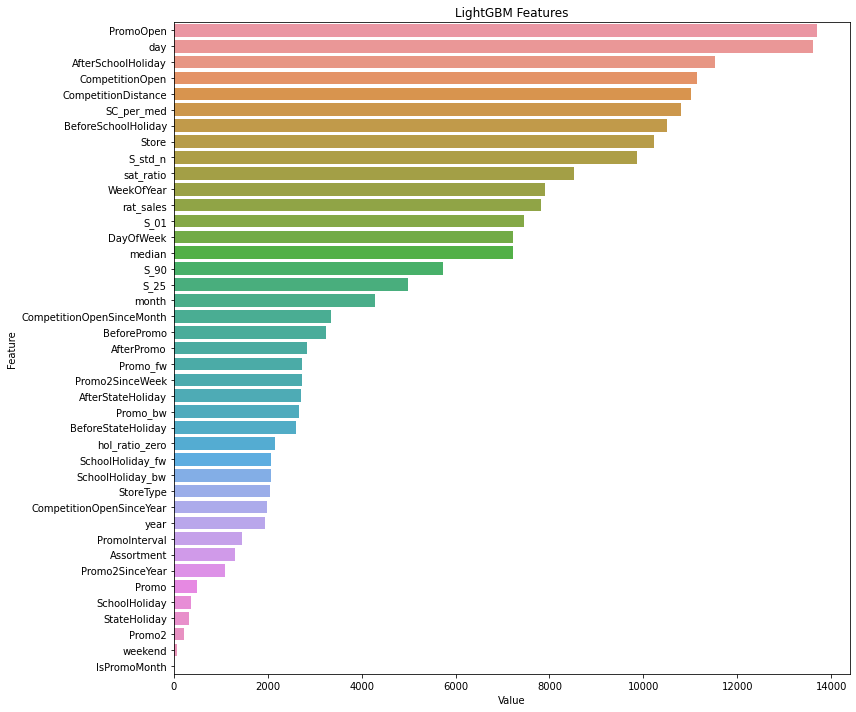

In [ ]:

import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
y_pred_lgbm_t = lgbm.predict(full_test_no)

In [ ]:
y_lg=np.expm1(y_pred_lgbm_t).round(0)

In [ ]:
#y_lg

array([3587.52, 6204.43, 4011.72, ..., 3803.66, 2724.98, 5473.19])

In [ ]:
y_lg

array([3670., 6083., 4080., ..., 3654., 2706., 6028.])

In [ ]:
final_data1 = {'Index ': re_test_in.index1, 'Response':y_lg }
submission7 = pd.DataFrame(data=final_data1)

In [ ]:
final_data1 = {'Index ':test_Z.index1, 'Response':0 }
submission_od = pd.DataFrame(data=final_data1)

In [ ]:
df_row = pd.concat([submission7, submission_od])

In [ ]:
df_row=df_row.sort_values(by=['Index '],ascending=True)

In [ ]:
df_row

,Index,Response
0,0,0.0
0,1,3670.0
1,2,6083.0
2,3,4080.0
3,4,7267.0
...,...,...
254404,305158,9949.0
254405,305159,7001.0
254406,305160,3654.0
254407,305161,2706.0


In [ ]:
%cd "/content"
df_row.to_csv('i will.csv', index =False)

/content


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))

    errlgb.append(sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_lgbm))))
    p = lgbm.predict(full_test_no)
    y_pred_totlgb.append(p)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.07876865715528442


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.0783408174613842


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08020319386535105


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.0816704635313009


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08049230318083724


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08030845102831834


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.07880387773159717


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08047464313455768


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08021295236924812


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.08056572574723152


In [ ]:
#gb_fib = np.expm1(np.mean(y_pred_totlgb,0))
#gb_fib

array([3551.66496924, 6142.83067162, 3971.83292692, ..., 3765.67297973,
       2697.97741061, 5418.67500165])

In [ ]:
gb_fib = np.expm1(np.mean(y_pred_totlgb,0))
gb_fib

array([3529.36123459, 6209.61422362, 4187.94084101, ..., 3718.43257001,
       2699.33503624, 5748.52755298])

In [ ]:
final_data1 = {'Index ': re_test_in.index1, 'Response':gb_fib }
submission7 = pd.DataFrame(data=final_data1)

In [ ]:
final_data1 = {'Index ':test_Z.index1, 'Response':0 }
submission_od = pd.DataFrame(data=final_data1)

In [ ]:
gb_fib_j= pd.concat([submission7, submission_od])

In [ ]:
gb_fib_j= gb_fib_j.sort_values(by=['Index '],ascending=True)

In [ ]:
gb_fib_j

,Index,Response
0,0,0.000000
0,1,3529.361235
1,2,6209.614224
2,3,4187.940841
3,4,7162.587938
...,...,...
254404,305158,9842.394938
254405,305159,7022.673344
254406,305160,3718.432570
254407,305161,2699.335036


In [ ]:
gb_fib_j.reset_index(inplace=True)

In [ ]:
gb_fib_j

In [ ]:
%cd "/content"
gb_fib_j.to_csv('winning_on.csv', index =False)

/content


# training with fastai